# Data Science Internship Candidate Evaluation Task



*   Submitted to -Accredian
*   Submitted By - Aniruddha Sarkar




##Problem: Predicting Fraudulent Transactions

Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor # for removing multicolinearity
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Performing EDA**

Loading dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud Transection Prediction/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Checking Null Values

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Identifying Correlation

<ipython-input-8-b7610c38e212>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

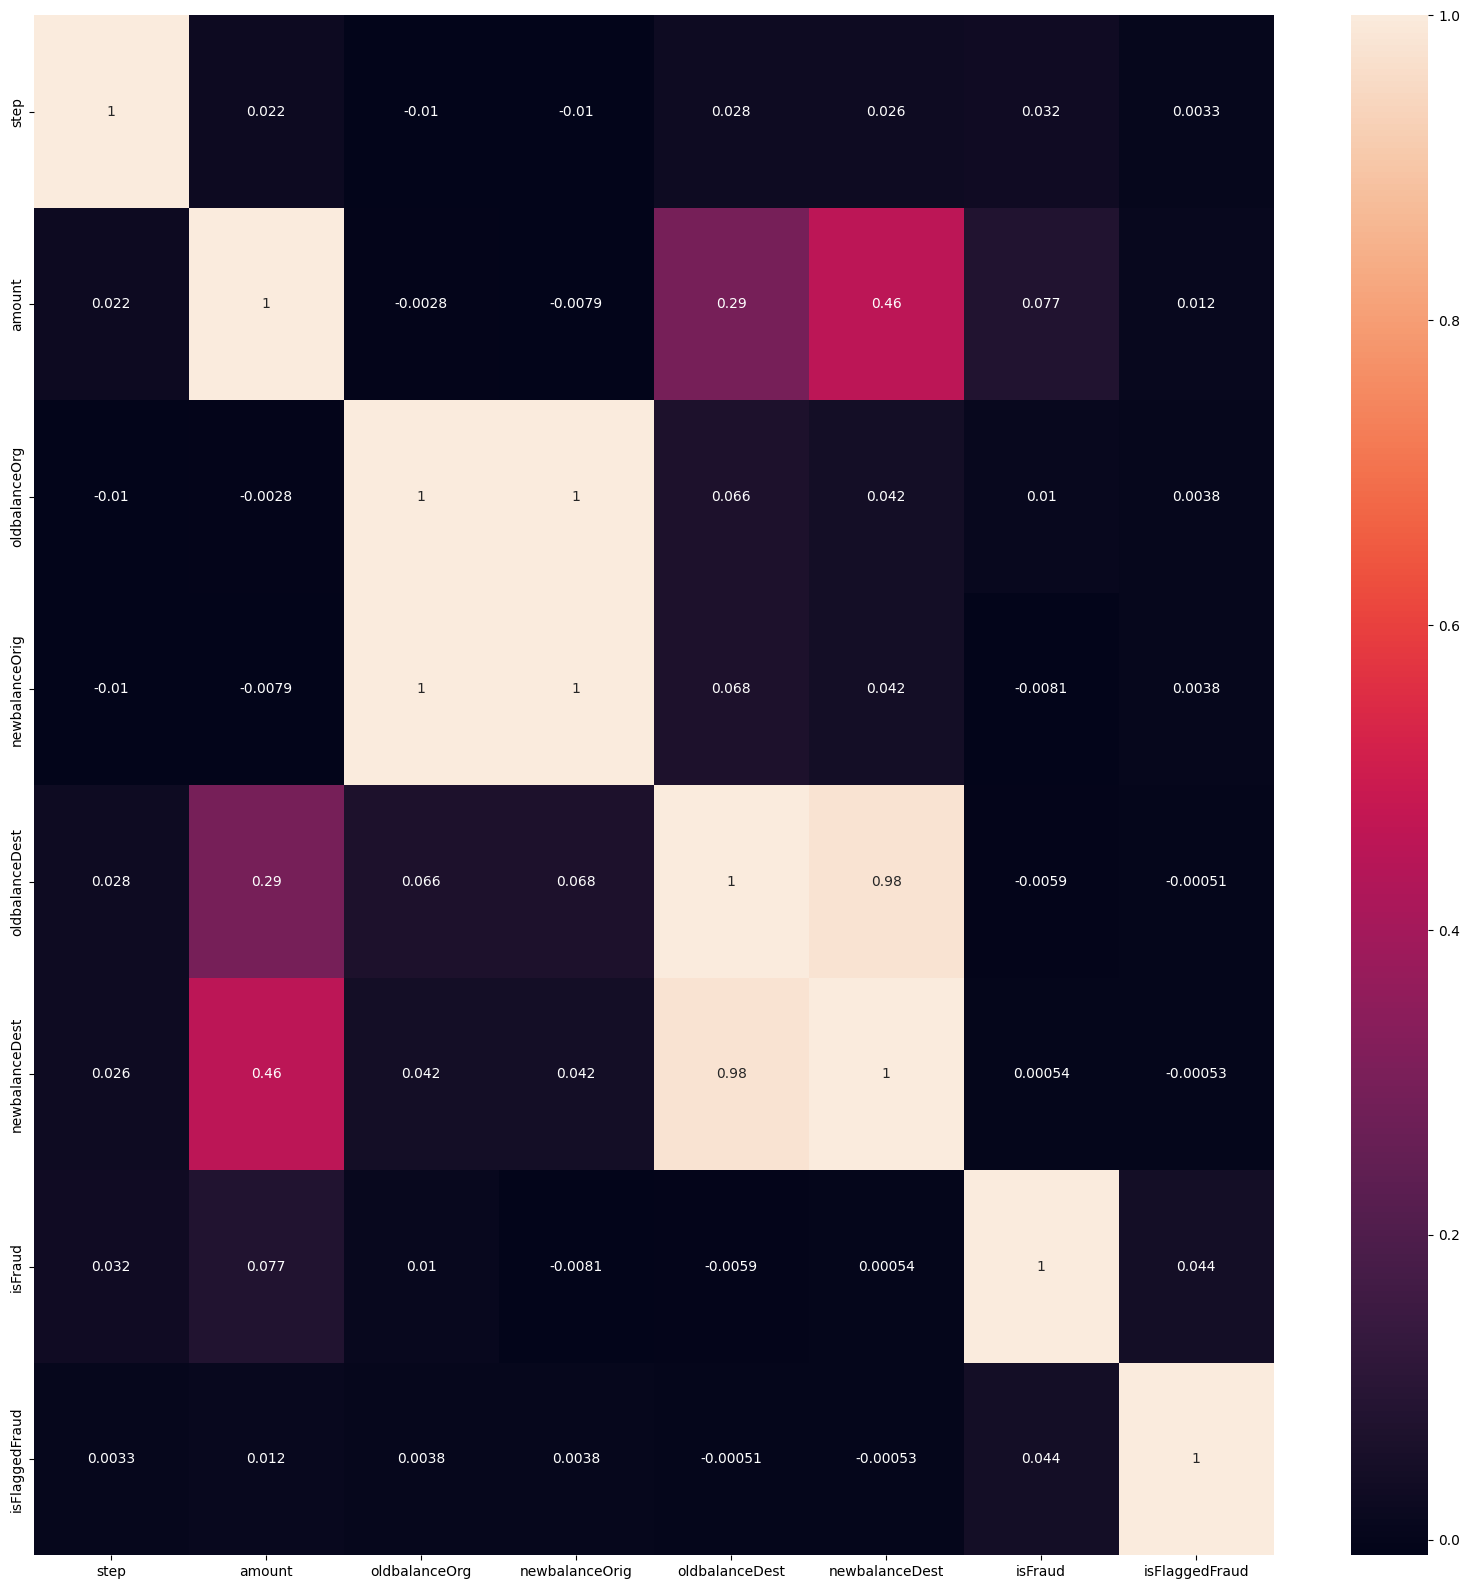

In [8]:
df.corr
plt.figure(figsize =(20,20))
sns.heatmap(df.corr(),annot=True)

From the heatmap, colinearity is found

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

Identifying Numerical and Catagorical features:

In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('Total {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nTotal {} categorical features : {}'.format(len(categorical_features), categorical_features))

Total 8 numerical features : ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

Total 3 categorical features : ['type', 'nameOrig', 'nameDest']


In [15]:
print("Categories in 'type' variable: ",df['type'].unique() )

Categories in 'type' variable:  ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


## Dropping Unnesessary Columns

Here, 'nameOrig', 'nameDest', 'isFlaggedFraud', 'oldbalanceDest',	'newbalanceDest' are representing id of users. These don't play any role in detecting the Fraudulent transactions. Because, a person who has not attempted any crime, doesn't give surity about he won't attempt in future.

In [4]:
df1 = df.drop(['step','nameOrig', 'nameDest','isFlaggedFraud','oldbalanceDest',	'newbalanceDest'], axis=1)

## Barplot

<Axes: xlabel='type', ylabel='isFraud'>

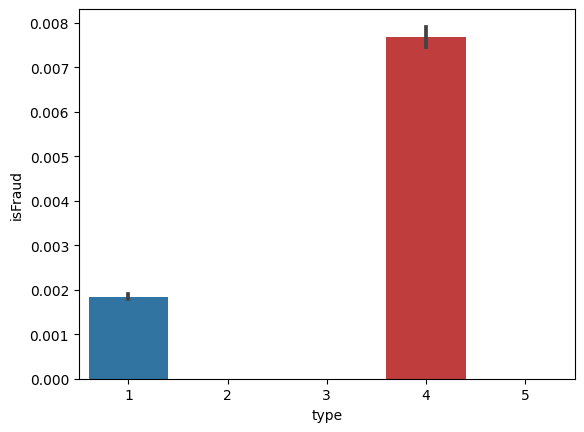

In [9]:
sns.barplot(data=df1, x="type", y="isFraud")

**Comments About the Barplot:**

From the plot, it can bee found that 'Cash Out' and 'Transfer' faces the most fraud cases and rest of them faces 0 cases.

The Numbers are:

In [15]:
print("Fraudulent transaction in 'Transfer:'",len(df1.loc[(df1.isFraud == 1) & (df1.type == 'TRANSFER')]),"\nFraudulent transaction in 'CashOut:' ",len(df1.loc[(df1.isFraud == 1) & (df1.type == 'CASH_OUT')]))

Fraudulent transaction in 'Transfer:' 4097 
Fraudulent transaction in 'CashOut:'  4116


##One Hot Encoding The values of 'type'

In [5]:
df1["type"] = df1["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3,"TRANSFER": 4,"DEBIT": 5})

Removing Multi Colinearity

In [6]:
def calculate_vif_(X, thresh=100):
  cols = X.columns
  variables = np.arange(X.shape[1])
  dropped=True
  while dropped:
    dropped=False
    c = X[cols[variables]].values
    vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        variables = np.delete(variables, maxloc)
        dropped=True

  print('New Table:')
  print(X.columns[variables])
  return X[cols[variables]]

In [9]:
df1 = calculate_vif_(df1)

New Table:
Index(['type', 'amount', 'oldbalanceOrg', 'isFraud'], dtype='object')


## Outliers Detection Between 'amount' and 'isFraud'

<Axes: xlabel='isFraud', ylabel='amount'>

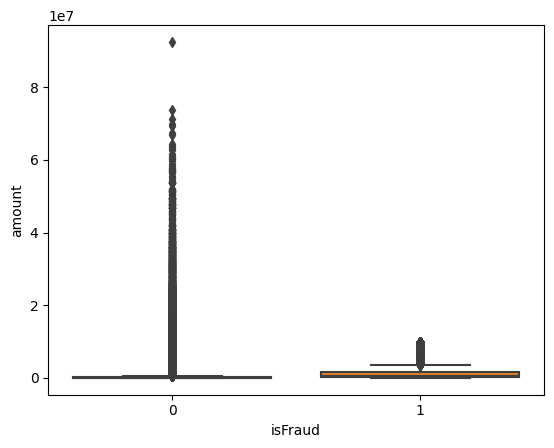

In [13]:
sns.boxplot(x = 'isFraud',y = 'amount',data = df1)

Significant amount of outliers are detected. But it is necessary to keep them.

## Model Development
# This is a Binary Classification Problem. The Task is to chose if the transaction is fraudulent or not

Independent and Dependent Variable Declaring

In [10]:
X = np.array(df1[["type", "amount", "oldbalanceOrg"]])

Y = np.array(df1[["isFraud"]])

importing Libraies for Model development

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20, random_state=42)

In [31]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

Testing Decision Tree Classifier

In [39]:
model1 = DecisionTreeClassifier()

In [40]:
models= model1.fit(xtrain, ytrain)
ytest_pred = models.predict(xtest)
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(ytrain, ytrain_pred)
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(ytest, ytest_pred)
print(' Training set Model performance')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))
print(' Test set Model performanc')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

 Training set Model performance
- Root Mean Squared Error: 0.0176
- Mean Absolute Error: 0.0003
- R2 Score: 0.7597
 Test set Model performanc
- Root Mean Squared Error: 0.0235
- Mean Absolute Error: 0.0006
- R2 Score: 0.5649


Testing KNN Classifier

In [42]:
model2 = KNeighborsClassifier()

In [43]:
models= model2.fit(xtrain, ytrain)
ytest_pred = models.predict(xtest)
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(ytrain, ytrain_pred)
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(ytest, ytest_pred)
print(' Training set Model performance')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))
print(' Test set Model performanc')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


 Training set Model performance
- Root Mean Squared Error: 0.0176
- Mean Absolute Error: 0.0003
- R2 Score: 0.7597
 Test set Model performanc
- Root Mean Squared Error: 0.0217
- Mean Absolute Error: 0.0005
- R2 Score: 0.6304


Testing Random Forest Classifier

In [44]:
model3 = RandomForestClassifier()

In [48]:
models= model3.fit(xtrain, ytrain)
ytest_pred = models.predict(xtest)
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(ytrain, ytrain_pred)
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(ytest, ytest_pred)
print(' Training set Model performance')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))
print(' Test set Model performanc')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

<ipython-input-48-81740ec1fb46>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  models= model3.fit(xtrain, ytrain)


 Training set Model performance
- Root Mean Squared Error: 0.0176
- Mean Absolute Error: 0.0003
- R2 Score: 0.7597
 Test set Model performanc
- Root Mean Squared Error: 0.0201
- Mean Absolute Error: 0.0004
- R2 Score: 0.6829


Testing SVM Classifier

In [49]:
model4 = svm.SVC(kernel='linear')

In [ ]:
models= model4.fit(xtrain, ytrain)
ytest_pred = models.predict(xtest)
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(ytrain, ytrain_pred)
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(ytest, ytest_pred)
print(' Training set Model performance')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))
print(' Test set Model performanc')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model5 = LogisticRegression()

In [ ]:
models= model5.fit(xtrain, ytrain)
ytest_pred = models.predict(xtest)
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(ytrain, ytrain_pred)
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(ytest, ytest_pred)
print(' Training set Model performance')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))
print(' Test set Model performanc')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

# Answers
---
## 1.   Dataset Cleaning

*   multi-collinearity obseved between newbalanceOrig and oldbalanceOrig. **Dropping 'newbalanceOrig' at index: 4**
*   Missing Values = 0
*   Significant amount of outliers are present. But it is necessary to keep them as some outliers are also present in 'isFraud' column.

## 2.   Description of the fraud Detection Model:

Detecting the transaction is fraudulent or not, is a classification problem. After evaluating the dataset, it has been found that the outliers are important. Because some outliers hold the information of a transaction being fraud.
For choosing the best model, 4 models have been selected. Among them
## 3.    Variable Selection:
*   The dependent variavles are: 	"type", "amount", "oldbalanceOrg"
*   independent variable selection: "isFraud"

The rest other variabeles are the id's of the recipient and sender. The 'isFlaggedFraud' variable can not input any effect in the overall model so it has been avoided.

## 4. Model performance using best set of tools.

Decision Tree Classifier-

## 5. Key factors that predict fraudulent customers, and these factors make any sense?

A pattern has been observed: All the fradulent transaction happened in 'Cash Out' and 'Transfer'.But this patterns can not ensure every single transaction is fair.So we can not stay dependent on these factors and we should focus on anomality.

## 6. What kind of prevention should be adopted while the company updates its infrastructure:

*   Installing a fraud detection model in the transaction system to predict an anomaly
*   The machine learning should be data-focused rather than model-focused and a CI-CD system must be integrated to ensure the latest updates to the prediction pipeline which can be achieved by best practices of mlops.
*   In the dataset, the illegal transaction limit has been set to 200.00 which does not ensure whether the transaction is fraudulent or not. For example, in a fraudulent transaction, the amount was 180.00. So this policy must be changed
* Focus on 'Cash Out* and 'Transfer' should be given highest priority.

## 7. How do we determine if the steps are practical?

The process of judging a system is to continuously examine it by giving real-world data that is unknown to it and asking whether or not the transaction is real or faulty. If it gives accurate answers, then this can be implemented or trusted.














